In [7]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans

%matplotlib ipympl

In [8]:
df=pd.read_excel('..\Tools\DataConverter\Converted.xlsx')
df.sample(5)

,Gender,Hormonal Background,The cardiovascular system,Genitourinary system,Gastrointestinal tract,Angiopathy,Tumors of other localization,RBC,MCV,RDW,...,GRAN,MID,LIM%,GRA%,MID%,NEUT,BO,BASO,MON,Ultrasound
14,1.0,0,0,0,0,0,0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1.0,0,1,0,0,0,0,-1.0,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,1.0,0,1,0,0,0,0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
92,1.0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
43,-1.0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        115 non-null    float64
 1   Hormonal Background           120 non-null    int64  
 2   The cardiovascular system     120 non-null    int64  
 3   Genitourinary system          120 non-null    int64  
 4   Gastrointestinal tract        120 non-null    int64  
 5   Angiopathy                    120 non-null    int64  
 6   Tumors of other localization  120 non-null    int64  
 7   RBC                           105 non-null    float64
 8   MCV                           81 non-null     float64
 9   RDW                           75 non-null     float64
 10  RDWa                          67 non-null     float64
 11  HCT                           81 non-null     float64
 12  PLT                           94 non-null     float64
 13  MPV  

In [10]:
df.dropna(inplace=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[["Gender",  # Пол
               "Hormonal Background",  # Гормональный фон
               "The cardiovascular system",  # Сердечно сосудистая система
               "Genitourinary system",  # Мочеполовая система
               "Gastrointestinal tract",  # Желудочно- кишечный тракт
               "Angiopathy",  # Ангиопатия
               "Tumors of other localization",  # Опухоли другой локализации
              "RBC",
               "MCV",
               "RDW",
               "RDWa",
               "HCT",
               "PLT",
               "MPV",
               "PDW",
               "PCT",
               "LPCR",
               "WBC",
               "HGB",
               "MCH",
               "MCHC",
               "LYM",
               "GRAN",
               "MID",
               "LIM%",
               "GRA%",
               "MID%",
               "NEUT",
               "BO",
               "BASO",
               "MON",
               "Ultrasound"]] = scaler.fit_transform(df[["Gender",  # Пол
               "Hormonal Background",  # Гормональный фон
               "The cardiovascular system",  # Сердечно сосудистая система
               "Genitourinary system",  # Мочеполовая система
               "Gastrointestinal tract",  # Желудочно- кишечный тракт
               "Angiopathy",  # Ангиопатия
               "Tumors of other localization",  # Опухоли другой локализации
              "RBC",
               "MCV",
               "RDW",
               "RDWa",
               "HCT",
               "PLT",
               "MPV",
               "PDW",
               "PCT",
               "LPCR",
               "WBC",
               "HGB",
               "MCH",
               "MCHC",
               "LYM",
               "GRAN",
               "MID",
               "LIM%",
               "GRA%",
               "MID%",
               "NEUT",
               "BO",
               "BASO",
               "MON",
               "Ultrasound"]])
df


,Gender,Hormonal Background,The cardiovascular system,Genitourinary system,Gastrointestinal tract,Angiopathy,Tumors of other localization,RBC,MCV,RDW,...,GRAN,MID,LIM%,GRA%,MID%,NEUT,BO,BASO,MON,Ultrasound
41,0.365148,0.0,1.125463,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,0.0,-0.25,-0.311086,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.365148,0.0,-0.888523,-0.311086,-0.174078,0.0,0.0,0.0,-4.00,0.000000,...,0.0,-0.25,-0.311086,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,-2.738613,0.0,-0.888523,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,0.0,-0.25,-0.311086,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.365148,0.0,1.125463,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,0.0,-0.25,-0.311086,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.365148,0.0,1.125463,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,0.0,-0.25,-0.311086,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,0.365148,0.0,-0.888523,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,0.0,-0.25,-0.311086,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,0.365148,0.0,1.125463,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,0.0,-0.25,-0.311086,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.365148,0.0,-0.888523,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,0.0,4.00,-0.311086,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.365148,0.0,1.125463,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,0.0,-0.25,-0.311086,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0.365148,0.0,-0.888523,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,0.0,-0.25,-0.311086,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    plt.plot(means,inertias,'o-')
    plt.xlabel("n o c")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

In [13]:
for k in range(1,12):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df)
    df[f'KMeans_{k}'] = kmeans.labels_

C:\Users\Xtron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Xtron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Xtron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

In [14]:
df

,Gender,Hormonal Background,The cardiovascular system,Genitourinary system,Gastrointestinal tract,Angiopathy,Tumors of other localization,RBC,MCV,RDW,...,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6,KMeans_7,KMeans_8,KMeans_9,KMeans_10,KMeans_11
41,0.365148,0.0,1.125463,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,1,0,1,0,3,3,2,0,1,3
42,0.365148,0.0,-0.888523,-0.311086,-0.174078,0.0,0.0,0.0,-4.00,0.000000,...,0,1,3,2,2,1,5,5,3,6
43,-2.738613,0.0,-0.888523,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,1,0,2,1,1,0,1,4,2,0
44,0.365148,0.0,1.125463,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,1,0,1,0,3,3,2,0,1,3
45,0.365148,0.0,1.125463,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,1,0,1,0,3,3,2,0,1,3
46,0.365148,0.0,-0.888523,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,1,0,2,1,1,0,1,4,2,0
48,0.365148,0.0,1.125463,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,1,0,1,0,3,3,2,0,1,3
49,0.365148,0.0,-0.888523,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,1,2,0,3,5,2,4,3,6,7
50,0.365148,0.0,1.125463,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,1,0,1,0,3,3,2,0,1,3
51,0.365148,0.0,-0.888523,-0.311086,-0.174078,0.0,0.0,0.0,0.25,0.000000,...,1,0,2,1,1,0,1,4,2,0


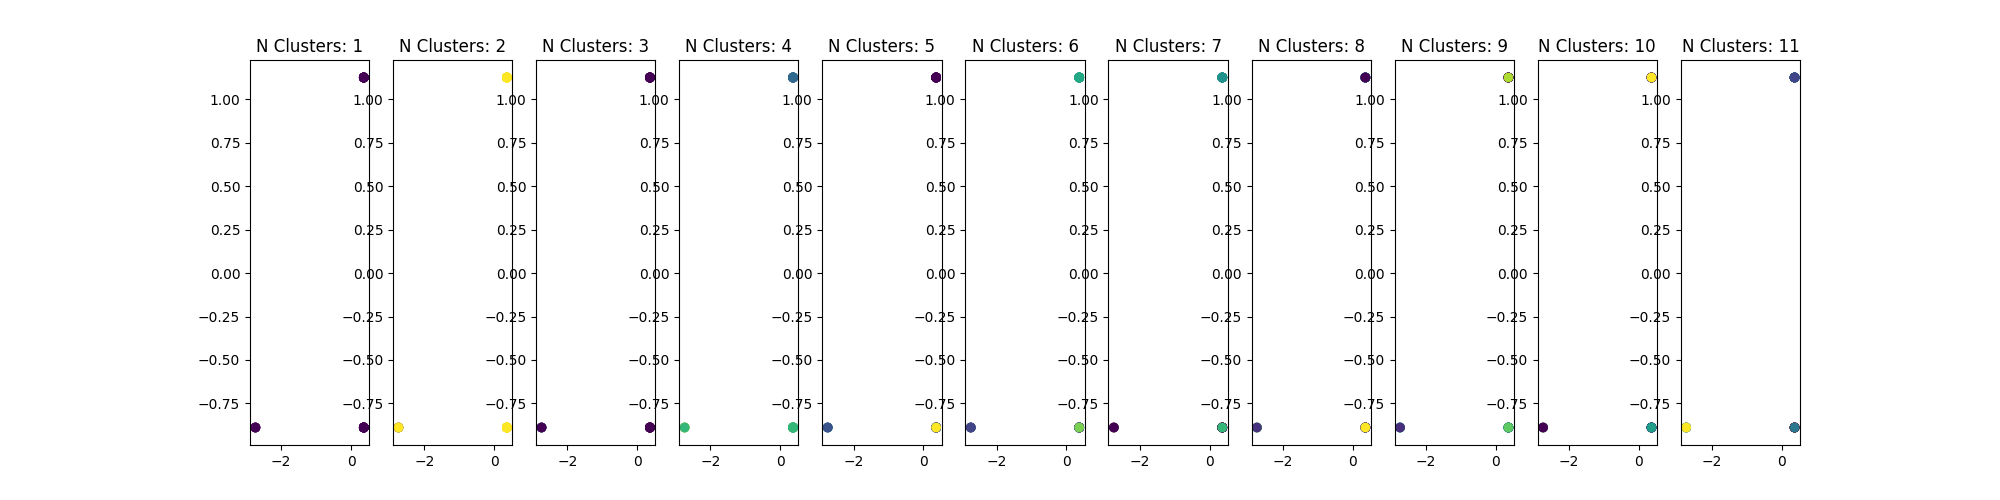

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(20,5))

for i, ax in enumerate(fig.axes,start=1):
    ax.scatter(df['Gender'],df['The cardiovascular system'], c=df[f'KMeans_{i}'], alpha=0.1)
    ax.set_title(f'N Clusters: {i}')

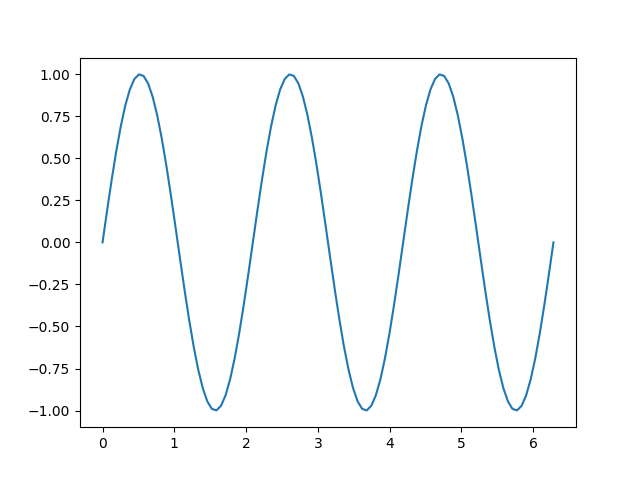

In [64]:
fig, ax = plt.subplots()


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)